Handwritten Digit Prediction using Python and Logistic Regression

In [10]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits


In this step, we will load the dataset and visualize some of the images to understand the data.

Dataset Shape: (1797, 64)
Number of Classes: 10


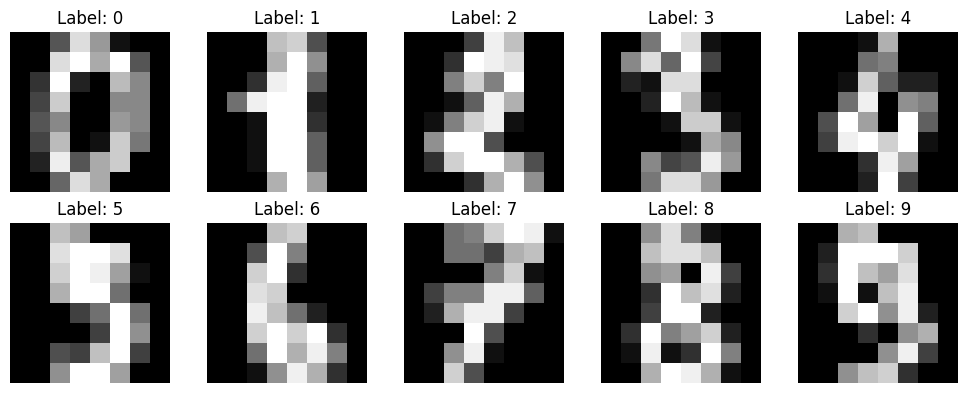

In [11]:
# Load the digits dataset
digits = load_digits()

# Display the dataset information
print("Dataset Shape:", digits.data.shape)
print("Number of Classes:", len(digits.target_names))

# Display some example images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
# Split data into features and target
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1437, 64)
Testing Data Shape: (360, 64)


We will now train a Logistic Regression model on the training data

In [13]:
# Create and train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [14]:
# Debugging: Check the shapes of the test set
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Predict the test data
try:
    y_pred = model.predict(X_test)
    print("Prediction successful!")
except Exception as e:
    print("Error during prediction:", e)

# Debugging: Check shapes of predictions
print("Shape of y_pred:", y_pred.shape if 'y_pred' in locals() else "Prediction not completed")

# Calculate accuracy if prediction is successful
if 'y_pred' in locals():
    try:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of the model on the test set: {accuracy * 100:.2f}%")
    except Exception as e:
        print("Error during accuracy calculation:", e)
else:
    print("Skipping accuracy calculation due to prediction error.")


Shape of X_test: (360, 64)
Shape of y_test: (360,)
Prediction successful!
Shape of y_pred: (360,)
Accuracy of the model on the test set: 97.50%


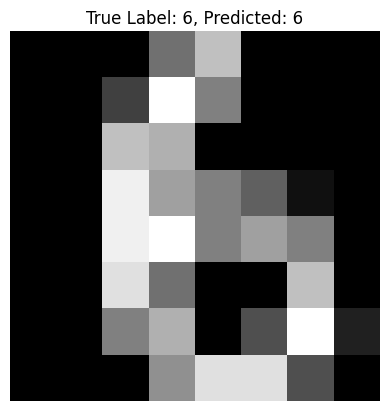

In [15]:
# Test with a new image
sample_index = 0  # You can change this to test other images
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

# Predict the digit
predicted_label = model.predict([sample_image])

# Display the image and prediction
plt.imshow(sample_image.reshape(8, 8), cmap='gray')
plt.title(f"True Label: {sample_label}, Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()
